# Γκολφ, Θερισμός, Ομαλοποίηση

Προσαρμοσμένο από [την αντίστοιχη τεκμηρίωση του TensorFlow](https://www.tensorflow.org/tutorials/keras/overfit_and_underfit).

---

> Πάνος Λουρίδας, Αναπληρωτής Καθηγητής <br />
> Τμήμα Διοικητικής Επιστήμης και Τεχνολογίας <br />
> Οικονομικό Πανεπιστήμιο Αθηνών <br />
> louridas@aueb.gr

In [1]:
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from keras import layers, regularizers

from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np

tf.random.set_seed(0) # for replicability purposes, not for production

* Τα δεδομένα που θα χρησιμοποιήσουμε προέρχονται από μία έρευνα όπου εξετάστηκαν οι δυνατότητες νευρωνικών δικτύων στην αναζήτηση νέων σωματιδίων στη φυσική: Baldi, P., Sadowski, P. & Whiteson, D. Searching for exotic particles in high-energy physics with deep learning. Nat Commun 5, 4308 (2014). https://doi.org/10.1038/ncomms5308.

* Το σύνολο των δεδομένων είναι διαθέσιμο από το <https://archive.ics.uci.edu/ml/datasets/HIGGS>. Εμείς για πρακτικούς λόγους θα χρησιμοποιήσουμε ένα υποσύνολο με 13.000 δείγματα.

* Ο σκοπός είναι να κάνουμε ταξινόμηση μεταξύ δύο κλάσεων (στήλη `label`, αν υπάρχει ένδειξη ή όχι) με βάση 28 χαρακτηριστικά.

In [2]:
higgs_data = pd.read_csv("higgs.csv", dtype=float)
higgs_data

,label,lepton pT,lepton eta,lepton phi,missing energy magnitude,missing energy phi,jet 1 pt,jet 1 eta,jet 1 phi,jet 1 b-tag,...,jet 4 eta,jet 4 phi,jet 4 b-tag,m_jj,m_jjj,m_lv,m_jlv,m_bb,m_wbb,m_wwbb
0,1.0,0.869293,-0.635082,0.225690,0.327470,-0.689993,0.754202,-0.248573,-1.092064,0.000000,...,-0.010455,-0.045767,3.101961,1.353760,0.979563,0.978076,0.920005,0.721657,0.988751,0.876678
1,1.0,0.907542,0.329147,0.359412,1.497970,-0.313010,1.095531,-0.557525,-1.588230,2.173076,...,-1.138930,-0.000819,0.000000,0.302220,0.833048,0.985700,0.978098,0.779732,0.992356,0.798343
2,1.0,0.798835,1.470639,-1.635975,0.453773,0.425629,1.104875,1.282322,1.381664,0.000000,...,1.128848,0.900461,0.000000,0.909753,1.108330,0.985692,0.951331,0.803252,0.865924,0.780118
3,0.0,1.344385,-0.876626,0.935913,1.992050,0.882454,1.786066,-1.646778,-0.942383,0.000000,...,-0.678379,-1.360356,0.000000,0.946652,1.028704,0.998656,0.728281,0.869200,1.026736,0.957904
4,1.0,1.105009,0.321356,1.522401,0.882808,-1.205349,0.681466,-1.070464,-0.921871,0.000000,...,-0.373566,0.113041,0.000000,0.755856,1.361057,0.986610,0.838085,1.133295,0.872245,0.808487
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12995,0.0,0.915045,-0.318542,0.623526,0.431166,1.338325,0.641709,-0.750620,1.153816,2.173076,...,-0.691704,-0.797121,0.000000,0.662336,0.888811,0.994402,0.876122,1.207429,0.790956,0.733438
12996,0.0,1.076093,0.377846,0.301706,0.297954,-1.517734,0.715086,1.019911,-1.453517,2.173076,...,-0.261967,0.204601,3.101961,1.031421,0.828652,0.986768,0.845410,1.701100,1.004952,0.854111
12997,1.0,1.296986,-1.198036,0.437647,1.742790,-0.218009,2.283859,-0.934802,1.201492,0.000000,...,-0.142873,1.619627,0.000000,1.124735,2.031752,1.159143,0.975911,1.069575,1.566676,1.410350
12998,1.0,1.151859,-0.981815,-1.661498,0.741689,0.353002,0.667175,0.204952,0.488566,2.173076,...,-0.825788,-0.094044,1.550981,0.973411,0.997322,1.242204,0.739249,0.681640,0.757485,0.812424


* Θα πάρουμε 11.000 δείγματα για εκπαίδευση και επικύρωση και θα χρησιμοποιήσουμε 2.000 δείγματα για έλεγχο.

In [3]:
X_train, X_test, y_train, y_test = train_test_split(higgs_data.iloc[:, 1:], 
                                                    higgs_data.iloc[:, 0], 
                                                    train_size=11000)

* Θα εξασφαλίσουμε ότι οι τιμές των χαρακτηριστικών έχουν μέση τιμή μηδέν και διακύμανση ένα.

In [4]:
normalizer = layers.Normalization()
normalizer.adapt(np.array(X_train))

* Στο μοντέλο μας θα χρησιμοποιήσουμε μία συνάρτηση ενεργοποίησης που δεν έχουμε ξαναδεί, την Εκθετική Γραμμική Μονάδα, ELU (Exponential Linear Unit):

$$
  f(x) = 
  \begin{cases} 
   x &  x > 0 \\
   \alpha (e^{x} - 1) &  x \le 0
  \end{cases}
$$

* Η ELU διαφέρει από τη ReLU στο ότι είναι πιο ομαλή κοντά στο σημείο μηδέν και επιπλέον μπορεί να δώσει αρνητική έξοδο.

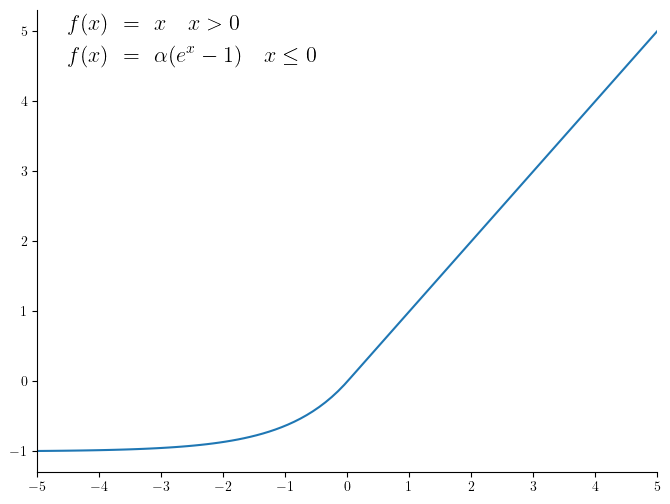

In [5]:
plt.rcParams["text.usetex"] = True

elu_label = (
    r"\begin{eqnarray*}"
    r"f(x) &=& x \quad x > 0 \\"
    r"f(x) &=& \alpha (e^{x} - 1)\quad  x \le 0"
    r"\end{eqnarray*}"
)
fig = plt.figure(figsize=(8, 6))
ax = plt.axes()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xlim((-5, 5))
plt.xticks(np.arange(-5, 6, 1))
x = np.linspace(-5, 5, 100)
y = np.zeros_like(x)
y = x.copy()
alpha = 1
y[0:50] = alpha * (np.exp(x[0:50]) - 1)
ax.text(-4.5, 5, elu_label, color="k", fontsize=16)
_ = plt.plot(x, y)

* Θα ορίσουμε τον αριθμό των εποχών, το μέγεθος κάθε φουρνιάς, και από εκεί τον αριθμό των βημάτων εκπαίδευσης σε κάθε εποχή.

In [6]:
NUM_EPOCHS = 10000
BATCH_SIZE = 100
STEPS_PER_EPOCH = X_train.shape[0] // BATCH_SIZE

* Μία σημαντική υπερπαράμετρος στα νευρωνικά δίκτυα είναι ο *ρυθμός εκμάθησης* (learning rate).

* Αυτός ορίζει πόσο μεγάλες θα είναι οι διορθώσεις που γίνονται στα βάρη και στις πολώσεις σε κάθε βήμα της εκμάθησης.

* Αν ο ρυθμός εκμάθησης είναι μεγάλος, τότε οι διορθώσεις είναι μεγάλες, και το δίκτυο μαθαίνει γρήγορα.

* Από την άλλη, μπορεί να είναι «απρόσεχτο»: οι διορθώσεις να είναι τόσο μεγάλες, ώστε να ξεφύγει από τις βέλτιστες τιμές των βαρών και των πολώσεων.

* Αν ο ρυθμός εκμάθησης είναι μικρός, τότε οι διορθώσεις είναι μικρότερες, το δίκτυο μαθαίνει πιο συντηρητικά, και χρειάζεται περισσότερος χρόνος για την εκπαίδευση.

* Ένας τρόπος να το προσεγγίσουμε αυτό είναι να σκεφτούμε τι γίνεται στο γκολφ.

* Στην αρχή ο παίκτης είναι μακριά από την τρύπα και τα χτυπήματά του θα είναι δυνατά, ώστε γρήγορα η μπάλα να προσεγγίσει την τρύπα.

* Όταν όμως πλησιάσει στην τρύπα, ο παίκτης γίνεται πιο προσεκτικός. Αν συνεχίσει να χτυπάει με τον ίδιο τρόπο, η μπάλα απλώς θα φεύγει από την άλλη μεριά.

* Αν χρησιμοποιήσουμε τον βελτιστοποιητή Adam (ή και άλλους), μπορούμε να ορίσουμε ένα μεταβλητό ρυθμό εκμάθησης.

* Συγκεκριμένα, θα ορίσουμε ένα *πρόγραμμα εκμάθησης* (learning schedule), στο οποίο o ρυθμός εκμάθησης θα μειώνεται βαθμιαία.

* Η ιδέα είναι ότι αρχικά θέλουμε το νευρωνικό μας δίκτυο να μαθαίνει γρήγορα, αλλά όσο προχωράει η εκπαίδευση θέλουμε να γίνεται πιο προσεκτικό.

* Χρησιμοποιώντας την κλάση `InverseTimeDecay` ορίζουμε ότι θα ξεκινήσουμε με έναν αρχικό ρυθμό εκμάθησης και στη συνέχεια κάθε 100 εποχές αυτός θα μειώνεται ώστε στις 100 εποχές να γίνει 1/2 του αρχικού, στις 200 το 1/3 του αρχικού, κ.ο.κ.

In [7]:
lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(
  0.001,
  decay_steps=STEPS_PER_EPOCH * 100,
  decay_rate=1,
  staircase=False)

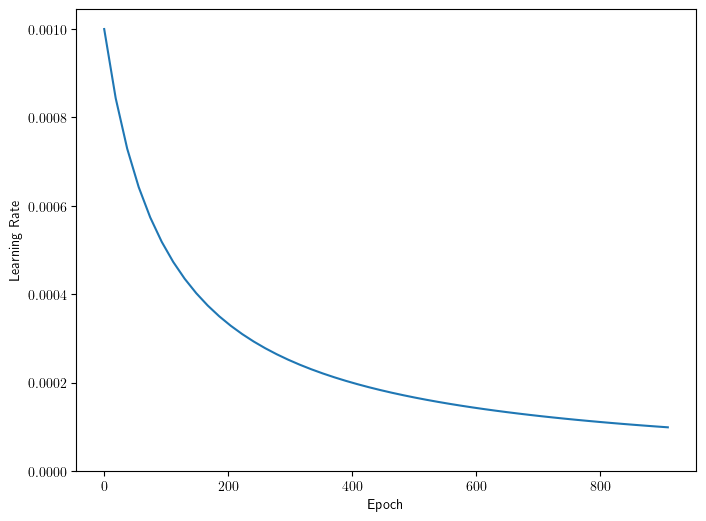

In [8]:
step = np.linspace(0,100000)
lr = lr_schedule(step)
plt.figure(figsize = (8,6))
plt.plot(step/STEPS_PER_EPOCH, lr)
plt.ylim([0,max(plt.ylim())])
plt.xlabel('Epoch')
_ = plt.ylabel('Learning Rate')

* Φτιάχνουμε τώρα το μοντέλο μας, όπου θα χρησιμοποιήσουμε όπως στην αρχική δημοσίευση στρώματα των 300 νευρώνων.

* Στο τέλος θα έχουμε ένα στρώμα με σιγμοειδή συνάρτηση ενεργοποίησης, αφού θέλουμε ταξινόμηση μεταξύ δύο κλάσεων.

* Η απώλεια θα υπολογίζεται μέσω της κλάσης `BinaryCrossentropy` και ως μετρικές θα έχουμε την`BinaryAccuracy` και την `BinaryCrossEntropy` (θα επανέλθουμε αργότερα σε αυτό το σημείο).

In [9]:
model = keras.Sequential([
    normalizer,
    layers.Dense(300, activation='elu'),
    layers.Dense(300, activation='elu'),
    layers.Dense(300, activation='elu'),    
    layers.Dense(300, activation='elu'),
    layers.Dense(300, activation='elu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
              optimizer=tf.keras.optimizers.Adam(lr_schedule),
              metrics=[
                  tf.keras.losses.BinaryCrossentropy(from_logits=False, name='binary_crossentropy'),
                  tf.metrics.BinaryAccuracy(threshold=0.5)
              ])

* Να το δούμε συνοπτικά.

In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization (Normalization)   │ (11000, 28)            │            57 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 57 (232.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 57 (232.00 B)

* Θα εκπαιδεύσουμε το μοντέλο μας μέχρι 10000 εποχές.

* Αντί να εμφανίζουμε την πρόοδο ανά μία εποχή (πάρα πολλές), θα εμφανίζουμε την πρόοδο ανά 100 εποχές, ενώ κάθε μία εποχή που ολοκληρώνεται θα τυπώνουμε απλώς μια τελεία.  

* Για να το κάνουμε αυτό θα ορίσουμε μία δική μας κλάση που θα δώσουμε στο TensorFlow ως callback.

In [11]:
# From https://github.com/tensorflow/docs/blob/master/tools/tensorflow_docs/modeling/__init__.py
class EpochDots(tf.keras.callbacks.Callback):
    """A simple callback that prints a "." every epoch, with occasional reports.
    
    Args:
        report_every: How many epochs between full reports
        dot_every: How many epochs between dots.
    """

    def __init__(self, report_every=100, dot_every=1):
        self.report_every = report_every
        self.dot_every = dot_every

    def on_epoch_end(self, epoch, logs):
        if epoch % self.report_every == 0:
            print()
            print('Epoch: {:d}, '.format(epoch), end='')
            for name, value in sorted(logs.items()):
                print('{}:{:0.4f}'.format(name, value), end=',  ')
            print()

        if epoch % self.dot_every == 0:
            print('.', end='', flush=True)

* Και τώρα προχωράμε στην εκπαίδευση.

In [12]:
early_stop = [
    EpochDots(),
    tf.keras.callbacks.EarlyStopping(monitor='val_binary_crossentropy', patience=200),
]

history = model.fit(
    X_train, 
    y_train,
    epochs=NUM_EPOCHS,
    batch_size=BATCH_SIZE,
    validation_split=0.1,
    verbose=0,
    callbacks=early_stop)


Epoch: 0, binary_accuracy:0.6131,  binary_crossentropy:0.6540,  loss:0.6540,  val_binary_accuracy:0.6355,  val_binary_crossentropy:0.6365,  val_loss:0.6365,  
....................................................................................................
Epoch: 100, binary_accuracy:1.0000,  binary_crossentropy:0.0000,  loss:0.0000,  val_binary_accuracy:0.6373,  val_binary_crossentropy:3.1625,  val_loss:3.1625,  
....................................................................................................
Epoch: 200, binary_accuracy:1.0000,  binary_crossentropy:0.0000,  loss:0.0000,  val_binary_accuracy:0.6427,  val_binary_crossentropy:4.2523,  val_loss:4.2523,  
.....

* Μπορούμε να δούμε την εξέλιξη αν φτιάξουμε μια βοηθητική συνάρτηση για την απεικόνιση.

In [13]:
def plot_loss(history):
    plt.plot(history.history['binary_crossentropy'], label='training')
    plt.plot(history.history['val_binary_crossentropy'], label='validation')
    plt.xlabel('Epoch')
    plt.ylabel('Binary Crossentropy')
    plt.legend()
    plt.grid(True)

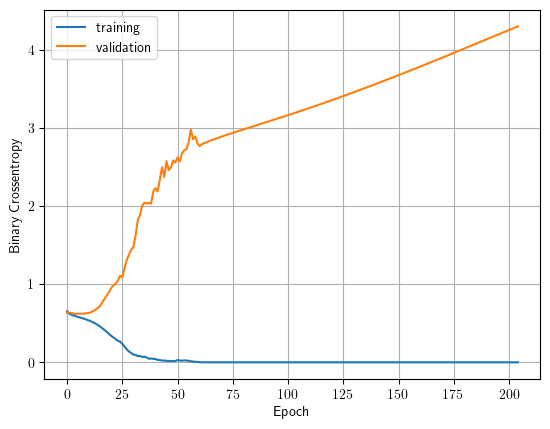

In [14]:
plot_loss(history)

* Τα αποτελέσματα είναι τραγωδία.

* Πολύ γρήγορα η απώλεια στην επικύρωση εκτοξεύεται.

* Αυτό είναι σαφής ένδειξη υπερπροσαρμογής.

* Ένας τρόπος να καταπολεμήσουμε την υπεπροσαρμογή στα νευρωνικά δίκτυα είναι μέσω του *dropout*, το οποίο ίσως στα ελληνικά θα μπορούσαμε να αποδώσουμε ως «θερισμός».

* Η [ιδέα πίσω από το dropout](https://en.wikipedia.org/wiki/Convolutional_neural_network#Dropout) είναι ότι σε κάθε βήμα της εκπαίδευσης, οι κόμβοι «απορρίπτονται» με πιθανότητα $p$ ή διατηρούνται με πιθανότητα $1 - p$.

* Στην πράξη δηλαδή, θερίζουμε από το νευρωνικό δίκτυο τους κόμβους με πιθανότητα $p$.

* Στο επόμενο βήμα της εκπαίδευσης, οι κόμβοι που θα απορριφθούν πάλι επιλέγονται τυχαία, άρα κάποιοι θα ξαναεισαχθούν και κάποιοι άλλοι θα βγουν.

In [18]:
model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    normalizer,
    layers.Dense(300, activation='elu'),
    layers.Dropout(0.5),
    layers.Dense(300, activation='elu'),
    layers.Dropout(0.5),    
    layers.Dense(300, activation='elu'),
    layers.Dropout(0.5),    
    layers.Dense(300, activation='elu'),
    layers.Dropout(0.5),    
    layers.Dense(300, activation='elu'),
    layers.Dropout(0.5),    
    layers.Dense(1, activation='sigmoid')
])

model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
              optimizer=tf.keras.optimizers.Adam(lr_schedule),
              metrics=[
                  tf.keras.losses.BinaryCrossentropy(from_logits=False, name='binary_crossentropy'),
                  tf.metrics.BinaryAccuracy(threshold=0.5)
              ])

In [19]:
history = model.fit(
    X_train, 
    y_train,
    epochs=NUM_EPOCHS,
    batch_size=BATCH_SIZE,
    validation_split=0.1,
    verbose=0,
    callbacks=early_stop)


Epoch: 0, binary_accuracy:0.5419,  binary_crossentropy:0.7959,  loss:0.7959,  val_binary_accuracy:0.6209,  val_binary_crossentropy:0.6509,  val_loss:0.6509,  
....................................................................................................
Epoch: 100, binary_accuracy:0.7129,  binary_crossentropy:0.5553,  loss:0.5553,  val_binary_accuracy:0.6864,  val_binary_crossentropy:0.5944,  val_loss:0.5944,  
....................................................................................................
Epoch: 200, binary_accuracy:0.7291,  binary_crossentropy:0.5256,  loss:0.5256,  val_binary_accuracy:0.6818,  val_binary_crossentropy:0.6112,  val_loss:0.6112,  
....................................................

* Βλέπουμε ότι η κατάσταση έχει κάπως βελτιωθεί.

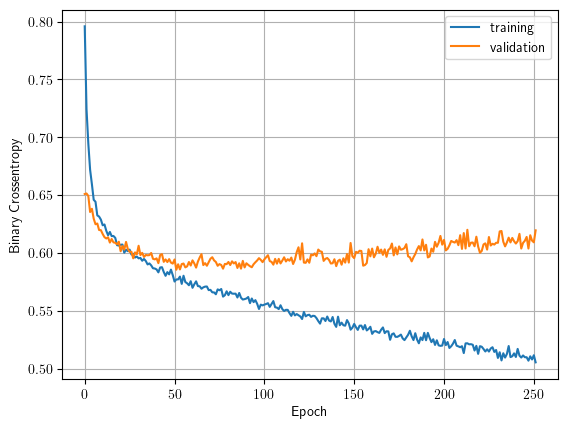

In [20]:
plot_loss(history)

* Μια άλλη ιδέα για να αποφύγουμε την υπερπροσαρμογή είναι η *ομαλοποίηση* (regularization).

* Στην προσέγγιση αυτή, ελαττώνουμε τα βάρη προς το μηδέν. 

* Ο λόγος είναι ότι όσο λιγότερα βάρη στο τελικό μοντέλο, τόσο λιγότερες παραμέτρους έχουμε στο τέλος, άρα τόσο πιο λιτό είναι το τελικό μοντέλο.

* Στην ομαλοποίηση L1, προσθέτουμε στην απώλεια μια ποσότητα ανάλογη με την απόλυτη τιμή του κάθε βάρους. Το αποτέλεσμα είναι να μηδενίζονται κάποια βάρη.

* Στην ομαλοποίηση L2, προσθέτουμε στην απώλεια μια ποσότητα ανάλογη με το τετράγωνο του κάθε βάρους. Το αποτέλεσμα είναι να ελαχιστοποιούνται (αλλά όχι να μηδενίζονται απολύτως) κάποια βάρη.

* Ειδικότερα, αν χρησιμοποιήσουμε `regularizers.l2(0.001)`, όπως παρακάτω, κάθε βάρος θα προσθέσει $0{,}001 \times w^2$ στην απώλεια του δικτύου.

* Αυτός είναι και ο λόγος που παρακολουθούμε την μετρική `binary_crossentropy` και όχι απλώς την απώλεια, γιατί δεν θέλουμε να λαμβάνουμε υπόψη την ομαλοποίηση.

* Τώρα στην έξοδο, τα `binary_crossentropy`, `val_binary_cross_entropy` θα διαφέρουν από τα `loss` και `val_loss`.

In [21]:
model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    normalizer,
    layers.Dense(300, 
                 kernel_regularizer=regularizers.l2(0.001),
                 activation='elu'),
    layers.Dense(300,
                 kernel_regularizer=regularizers.l2(0.001),
                 activation='elu'),
    layers.Dense(300,
                 kernel_regularizer=regularizers.l2(0.001),
                 activation='elu'),
    layers.Dense(300,
                 kernel_regularizer=regularizers.l2(0.001),
                 activation='elu'),
    layers.Dense(300,
                 kernel_regularizer=regularizers.l2(0.001),
                 activation='elu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
              optimizer=tf.keras.optimizers.Adam(lr_schedule),
              metrics=[
                  tf.keras.losses.BinaryCrossentropy(from_logits=False, name='binary_crossentropy'),
                  tf.metrics.BinaryAccuracy(threshold=0.5)
              ])

In [22]:
history = model.fit(
    X_train, 
    y_train,
    epochs=NUM_EPOCHS,
    batch_size=BATCH_SIZE,
    validation_split=0.1,
    verbose=0,
    callbacks=early_stop)


Epoch: 0, binary_accuracy:0.6171,  binary_crossentropy:0.6526,  loss:1.6127,  val_binary_accuracy:0.6427,  val_binary_crossentropy:0.6257,  val_loss:1.3258,  
....................................................................................................
Epoch: 100, binary_accuracy:0.7249,  binary_crossentropy:0.5438,  loss:0.5734,  val_binary_accuracy:0.6845,  val_binary_crossentropy:0.6021,  val_loss:0.6317,  
....................................................................................................
Epoch: 200, binary_accuracy:0.7422,  binary_crossentropy:0.5182,  loss:0.5489,  val_binary_accuracy:0.6782,  val_binary_crossentropy:0.6112,  val_loss:0.6418,  
..................................................................................

* Βλέπουμε ότι και η ομαλοποίηση μπορεί να βοηθήσει.

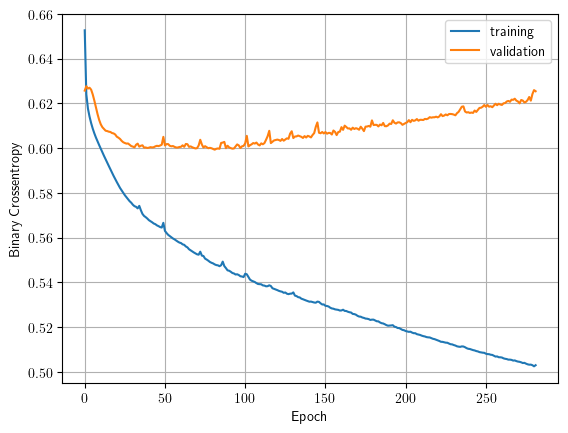

In [23]:
plot_loss(history)

* Οπότε, το επόμενο λογικό βήμα είναι να συνδυάσουμε και τις δύο μεθόδους για την αποφυγή της υπερπροσαρμογής.

In [24]:
model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    normalizer,
    layers.Dense(300, 
                 kernel_regularizer=regularizers.l2(0.001),
                 activation='elu'),
    layers.Dropout(0.5),
    layers.Dense(300,
                 kernel_regularizer=regularizers.l2(0.001),
                 activation='elu'),
    layers.Dropout(0.5),    
    layers.Dense(300,
                 kernel_regularizer=regularizers.l2(0.001),
                 activation='elu'),
    layers.Dropout(0.5),    
    layers.Dense(300,
                 kernel_regularizer=regularizers.l2(0.001),
                 activation='elu'),
    layers.Dropout(0.5),    
    layers.Dense(300,
                 kernel_regularizer=regularizers.l2(0.001),
                 activation='elu'),
    layers.Dropout(0.5),    
    layers.Dense(1, activation='sigmoid')
])

model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
              optimizer=tf.keras.optimizers.Adam(lr_schedule),
              metrics=[
                  tf.keras.losses.BinaryCrossentropy(from_logits=False, name='binary_crossentropy'),
                  tf.metrics.BinaryAccuracy(threshold=0.5)
              ])

In [25]:
history = model.fit(
    X_train, 
    y_train,
    epochs=NUM_EPOCHS,
    batch_size=BATCH_SIZE,
    validation_split=0.1,
    verbose=0,
    callbacks=early_stop)


Epoch: 0, binary_accuracy:0.5308,  binary_crossentropy:0.7926,  loss:1.9710,  val_binary_accuracy:0.6073,  val_binary_crossentropy:0.6509,  val_loss:1.7559,  
....................................................................................................
Epoch: 100, binary_accuracy:0.6665,  binary_crossentropy:0.6149,  loss:0.6450,  val_binary_accuracy:0.6800,  val_binary_crossentropy:0.6075,  val_loss:0.6380,  
....................................................................................................
Epoch: 200, binary_accuracy:0.6659,  binary_crossentropy:0.6087,  loss:0.6359,  val_binary_accuracy:0.6818,  val_binary_crossentropy:0.6069,  val_loss:0.6345,  
....................................................................................................
Epoch: 300, binary_accuracy:0.6749,  binary_crossentropy:0.6074,  loss:0.6335,  val_binary_accuracy:0.6791,  val_binary_crossentropy:0.6071,  val_loss:0.6334,  
......................................................

* Πετύχαμε ακόμα καλύτερη συμπεριφορά.

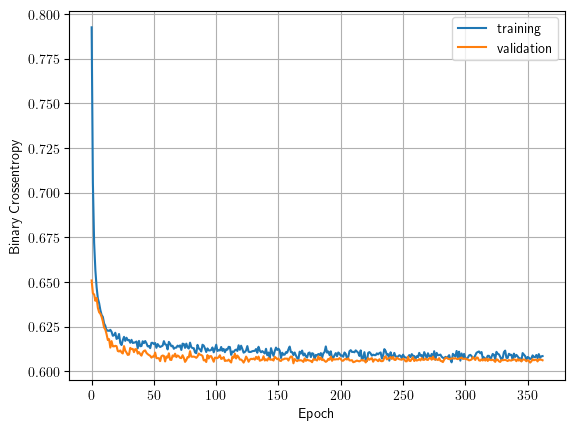

In [26]:
plot_loss(history)

* Μπορούμε επιπλέον να αξιολογήσουμε το μοντέλο μας με βάση τα δεδομένα ελέγχου.

In [27]:
metrics = model.evaluate(X_test, y_test, verbose=0)
for metric_name, metric in zip(model.metrics_names, metrics):
    print(metric_name, metric)

loss 0.6334555745124817
compile_metrics 0.6077806353569031


* Η εφαρμογή σωστής στρατηγικής για την αποφυγή υπερπροσαρμογής είναι βασικό συστατικό επιτυχίας σε ένα μοντέλο νευρωνικού δικτύου.

* Τα εργαλεία μας δίνουν τη δυνατότητα να στοιβάζουμε στρώματα επί στρωμάτων.

* Αυτό δεν σημαίνει ότι έτσι θα λύσουμε το πρόβλημα.

* Πρέπει να προσέχουμε πάντα να χρησιμοποιούμε σωστά τη δύναμη που μας δίνουν τα εργαλεία που έχουμε στα χέρια μας.